In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import pylatexenc
from qiskit import * #qiskit
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
#from qiskit.extensions import Initialize
from qiskit import QuantumCircuit, QuantumRegister, transpile#, assemble#, execute, Aer, BasicAer
from qiskit_aer import Aer
from qiskit.quantum_info import random_statevector
from qiskit.quantum_info import partial_trace, entropy
import qiskit.quantum_info as qi
from qiskit_ibm_runtime.fake_provider import FakeTorino
from qiskit.visualization import plot_distribution

from IPython.display import HTML, display
#import ipywidgets as widgets

In [4]:
import os
from qiskit_ibm_runtime.fake_provider import fake_backend


In [5]:
simulator = Aer.get_backend('qasm_simulator')

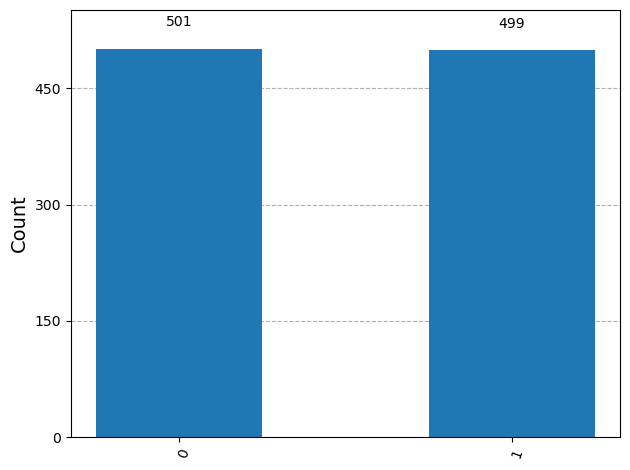

In [15]:
n_qubit = 1
qr0 = QuantumRegister(n_qubit)
cr0 = ClassicalRegister(n_qubit) #classical register to store resulting bits
qc0 = QuantumCircuit(qr0,cr0) #quantum circuit with quantum and classical registers
qc0.h(0)
qc0.measure(qr0,cr0)
simulator = Aer.get_backend('qasm_simulator')



# shots is number of execution
shots=1000

# execute the circuit
circuit0 = transpile(qc0, simulator)
job = simulator.run(circuit0, shots = shots)

# get a result
result = job.result() 

# get counts to obtain each bit string
counts = result.get_counts(qc0) 

# plot histogram
plot_histogram(counts) 



Simulating on FakeTorino backend:

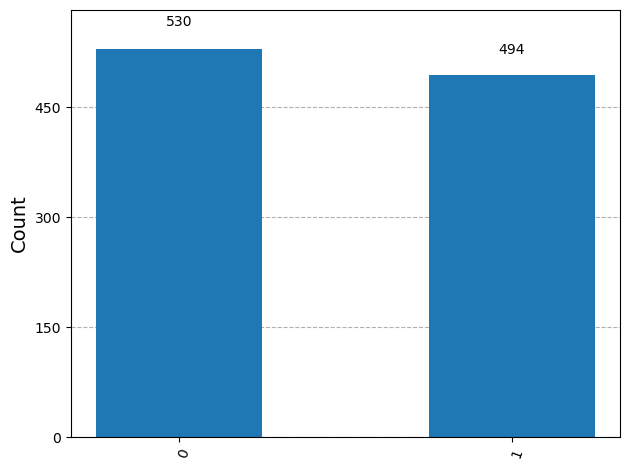

In [17]:
backend = FakeTorino()
job2 = backend.run(qc0)
#plot_distribution(job2.result().get_counts())
plot_histogram(job2.result().get_counts()) 

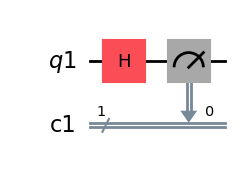

In [18]:
qc0.draw('mpl')

Simulating another circuit on FakeTorino:

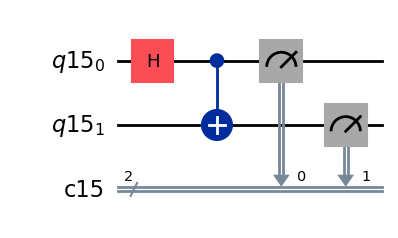

In [49]:
qr1 = QuantumRegister(2)
cr1 = ClassicalRegister(2)
qc1 = QuantumCircuit(qr1,cr1)
qc1.h(0)
qc1.cx(0,1)
qc1.measure(qr1,cr1)
qc1.draw('mpl')

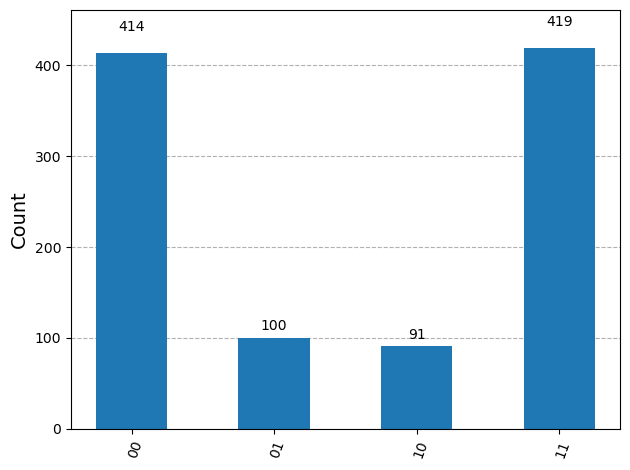

In [51]:
job3 = backend.run(qc1)
plot_histogram(job3.result().get_counts())